# Car Price Prediction Model
___
*A Capstone Project by Meylis Garryyev (June 2020)*

This is the 1st notebook of my capstone project.

## Part 1: Cleaning and Exploratory Data Analysis

Before starting working on our project, let's actually import python packages and libraries that we will be working with. In this notebook we will be working with ScikitLearn ML models and one XGBoost model. In another notebook, which is also provided, we will be working with Neural Networks run on Google's Colab space.

In [2]:
# Importing Python packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_absolute_error as mae
import joblib

# ML models used:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# if you don't have py-xgboost-cpu installed, just import my "capstone" conda environment that is provided with this notebook

#Some of these packages will generate a ton of warnings ...
import warnings
warnings.filterwarnings("ignore")

Let's first start with importing our dataset file. The dataset was acquired from Kaggle, and is being updated every few months. The dataset that is used in this notebook is Version 5, is the [source](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).

The main assumption in using this dataset was that prices that are shown for each ad were assumed to be the sold value of that particular car. 

In [3]:
# Loading the file as dataframe:
df_raw = pd.read_csv('data/vehicles.csv')

In [4]:
# Let's see the shape of our dataset:
print('Shape of the dataset: ', df_raw.shape)

# The head of the dataset:
df_raw.head()

Shape of the dataset:  (539759, 25)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


As we can see, our dataset consist of 539,759 rows and 25 columns, where each row represents each unique craigslist vehicle ad.

In [5]:
# Let's just get some more useful insights from our dataset:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

We can see that `county` column is actually a null column, no data is in it. So, let's remove it. But first, let's create a working copy of our raw dataframe.

In [6]:
# Creating a copy of the raw dataframe:
df_work1 = df_raw.copy()

# Dropping 'county' column:
df_work1 = df_work1.drop(['county'], axis=1)
df_work1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

Now, let's see if we have any duplicate rows.

In [7]:
# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

0

We can see that we don't have any duplicated rows. But is that really the case? Probably not, because we have some unique value columns in our dataset, like url's that were created for each ad, even if the ad was re-posted.

Let's actually remove some those columns (`id`,  `url`, `region_url`, `image_url`), which we won't be using for our model, as they probably won't make any useful impact on our model, but would take our computational capability. After dropping those, let's then check if we still have no duplicated rows.

In [8]:
# Dropping unnecessary columns:
df_work1 = df_work1.drop(['id', 'url', 'region_url', 'image_url'], axis=1)

# Let's see number of duplicate rows we have now:
df_work1.duplicated().sum()

37043

Now, as we can see, we have actually some duplicated rows. These were probably same ads posted few times. Let's remove them.

In [9]:
# Let's drop duplicate rows:
df_work1 = df_work1.drop_duplicates()

# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

0

We can see now that there are no duplicated rows left in our dataset.

We also don't really need the `vin` column, for the same reason as it this feature won't make much of a useful impact on our model. Additionally, we would also exclude `state` and `region` columns, as we would use `lat` and `long` columns instead. This would allow us to have much less columns at the end (saves computational load), as we won't have to turn `state` and `region` columns into binary columns, and we would have even more precise geographical information with `lat` and `long` columns.  Also, the `description` column will not be included for now, as it's a separate NLP problem, which is out of the scope of our project for now. So, let's drop those too.

In [10]:
# Dropping columns stated above:
df_work2 = df_work1.drop(['vin', 'description', 'region', 'state'], axis=1)
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502716 entries, 0 to 539758
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         502716 non-null  int64  
 1   year          501764 non-null  float64
 2   manufacturer  481335 non-null  object 
 3   model         495471 non-null  object 
 4   condition     283533 non-null  object 
 5   cylinders     300806 non-null  object 
 6   fuel          499504 non-null  object 
 7   odometer      415131 non-null  float64
 8   title_status  500059 non-null  object 
 9   transmission  498747 non-null  object 
 10  drive         360334 non-null  object 
 11  size          158068 non-null  object 
 12  type          370108 non-null  object 
 13  paint_color   344528 non-null  object 
 14  lat           494033 non-null  float64
 15  long          494033 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 65.2+ MB


Before we begin exploring our data, let's check if we have any empty values and replace those with null values.

In [11]:
# Let's check if we have rows with empty values, and replace those empty values with NaN values:
df_work2 = df_work2.replace({'':np.nan})

Now, let's explore our numerical columns distributions.

In [12]:
# View distribution range of numerical columns:
df_work2.describe()

,price,year,odometer,lat,long
count,5.027160e+05,501764.000000,4.151310e+05,494033.000000,494033.000000
mean,2.013242e+05,2009.804105,1.003181e+05,38.413751,-94.046993
std,2.268544e+07,9.277610,1.801603e+05,5.890140,17.599488
min,0.000000e+00,0.000000,0.000000e+00,-84.911400,-176.810000
25%,4.495000e+03,2007.000000,4.635800e+04,34.186400,-107.368000
50%,9.840000e+03,2012.000000,9.252000e+04,39.045500,-88.066500
75%,1.799500e+04,2015.000000,1.370500e+05,42.449000,-81.282700
max,4.294967e+09,2021.000000,6.480922e+07,84.514800,161.016000


Having some knowledge about cars, we know that it's extremely unlikely that someone would sell a car for \\$0 or very small amount. Also, some of the ads would include car parts wrongly (or maybe intentionally) posted in the car sales section. Besides that, we can also see some extremely high numbers for the price. Those were probably are fake prices.

So, to be avoid having wrong data in our dataset and to address skewness, let's look at and remove rows with a price of \\$0 to \\$500, and also price of more than \\$100,000, as those would be outliers.

In [13]:
# Looking at how many cars are advertised at the price of $500 or less, and $1000,000 or more:
print('Number of rows with a price of $500 or less =', df_work2['price'][df_work2['price'] <= 500.0].count())
print('Number of rows with a price of $100,000 or more =', df_work2['price'][df_work2['price'] >= 100000.0].count())

Number of rows with a price of $500 or less = 49617
Number of rows with a price of $100,000 or more = 490


We can see that 49,617 cars were advertised at the price of \\$500 or less, and 490 cars were advertised at the price of \\$100,000 or more.

In [14]:
# Let's now drop those:
df_work2.drop(df_work2.loc[df_work2['price']<=500].index, inplace=True)
df_work2.drop(df_work2.loc[df_work2['price']>=100000].index, inplace=True)

After initial filtering of our `price` column, let's view the distribution of it and see if we still have skewness left. 

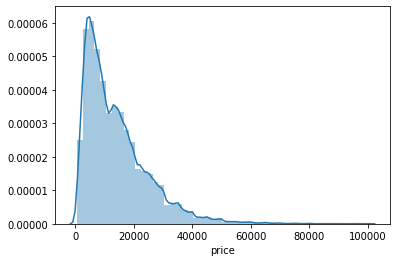

In [15]:
# Let's look at the distribution of the "price" column:
sns.distplot(df_work2["price"])

We can clearly see here that there are still some outliers. Ideally, I would like to set an upper price range of \\$40,000, and that would probably give me better model results. But due to my further plan of implementing this model into a website, and my intent to run tree based models, which we know won't be able to predict prices they haven't "seen", I decided to scope my price range up to \\$50,000. 

Number of rows with a price of $500 or less = 0
Number of rows with a price of $50,000 or more = 0


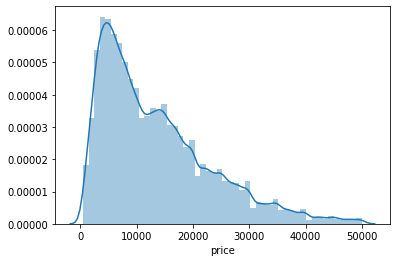

In [16]:
# Let's now drop those:
df_work2.drop(df_work2.loc[df_work2['price']>=50000].index, inplace=True)

# Double check if the values were dropped:
print('Number of rows with a price of $500 or less =', df_work2['price'][df_work2['price'] <= 500.0].count())
print('Number of rows with a price of $50,000 or more =', df_work2['price'][df_work2['price'] >= 50000.0].count())

# Let's look at the distribution of the "price" column:
sns.distplot(df_work2["price"])

Let's further explore our data.

In [17]:
# Let's see how many unique values each of the columns have:
df_work2.nunique(axis=0)

price            16582
year               111
manufacturer        42
model            34294
condition            6
cylinders            8
fuel                 5
odometer        114264
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
lat              53131
long             53155
dtype: int64

We can see that we have 34,294 unique values in our categorical `model` column. Converting them into dummy variables would take too many columns and would limit computational ability. I decided to drop this column.

In [18]:
# Dropping 'model' column:
df_work2 = df_work2.drop(['model'], axis=1)
df_work2.nunique(axis=0)

price            16582
year               111
manufacturer        42
condition            6
cylinders            8
fuel                 5
odometer        114264
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
lat              53131
long             53155
dtype: int64

We can see that the number of unique years is 111. Let's actually explore our `year` column.

In [19]:
# Looking at our 'year' column:
df_work2.describe()

,price,year,odometer,lat,long
count,447936.000000,447143.000000,3.716510e+05,444255.000000,444255.000000
mean,13494.169002,2009.452262,1.033392e+05,38.443925,-93.740187
std,9843.242874,9.376574,1.873337e+05,5.892406,17.429466
min,503.000000,0.000000,0.000000e+00,-84.911400,-176.810000
25%,5800.000000,2006.000000,4.964550e+04,34.221850,-106.286500
50%,10995.000000,2011.000000,9.576700e+04,39.123400,-87.931700
75%,18900.000000,2015.000000,1.400000e+05,42.449100,-81.143300
max,49999.000000,2021.000000,6.480922e+07,84.514800,161.016000


We can see from here that the min value for our `year` column is 0, and the max value is 2021 (data was scraped from Craigslist in Feb 2020). These are not realistic values. Let's now actually see unique years in our dataset.

In [20]:
print(sorted(df_work2['year'].unique(), reverse=True))

[2019.0, 2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987.0, 1986.0, 1985.0, 1984.0, 1983.0, 1981.0, 1980.0, 1979.0, 1977.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1964.0, 1951.0, 1950.0, 1949.0, 1942.0, 1929.0, nan, 2021.0, 2020.0, 1982.0, 1978.0, 1976.0, 1969.0, 1965.0, 1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1955.0, 1954.0, 1953.0, 1952.0, 1948.0, 1947.0, 1946.0, 1945.0, 1943.0, 1941.0, 1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0, 1931.0, 1930.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0, 1923.0, 1922.0, 1919.0, 1918.0, 1917.0, 1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1909.0, 1908.0, 1900.0, 0.0]


We can see that we have some NAN values too. Let's see how many we have.

In [21]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.239659
condition       41.309026
cylinders       39.253375
paint_color     31.027424
drive           28.374143
type            26.689974
odometer        17.030335
manufacturer     3.959717
long             0.821769
lat              0.821769
transmission     0.734703
fuel             0.642949
title_status     0.510341
year             0.177034
price            0.000000
dtype: float64

We have only 0.18% null values in our `year` column. As this is a tiny percentage, it was decided to drop those null values.

In [22]:
# Dropping null values in 'year' column:
df_work2.dropna(subset=['year'], inplace=True)
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.183333
condition       41.204939
cylinders       39.318294
paint_color     31.066348
drive           28.402323
type            26.717627
odometer        17.056288
manufacturer     3.789615
long             0.818977
lat              0.818977
transmission     0.731757
fuel             0.587508
title_status     0.441917
year             0.000000
price            0.000000
dtype: float64

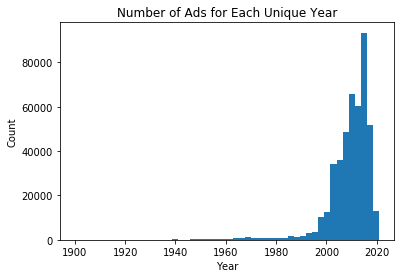

In [23]:
# Histogram of the years distribution:
plt.figure()
plt.hist(df_work2['year'], range=(1900,2021), bins=50)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Ads for Each Unique Year')
plt.show()

From the histogram above we can see that there were very few cars older than year of 1950 advertised. Let's exclude those outliers from our project scope. Again, here the scope was not too limited, as we could have set a lower range from 1980 or 1990 onwards, and get better results, but it was decided to have a higher range just for future plans of model implementation and the use of tree based models, as I have already described above.

In [24]:
# Let's now grab only years starting from 1950 and until current year of 2020:
df_work2 = df_work2[df_work2['year'].between(1950, 2020)]

# Let's just double check our years:
df_work2.describe()

,price,year,odometer,lat,long
count,446096.000000,446096.000000,3.705490e+05,442443.000000,442443.000000
mean,13457.875758,2009.620824,1.035323e+05,38.452336,-93.728282
std,9810.368517,8.183100,1.873696e+05,5.888064,17.426862
min,503.000000,1950.000000,0.000000e+00,-84.911400,-176.810000
25%,5800.000000,2006.000000,5.000000e+04,34.231600,-106.245000
50%,10995.000000,2011.000000,9.600000e+04,39.123400,-87.922700
75%,18900.000000,2015.000000,1.400100e+05,42.454400,-81.130300
max,49999.000000,2020.000000,6.480922e+07,84.514800,161.016000


From the above chart we can also see that our odometer column has some outliers too, with a min of 0 mileage, and max of really high values. For our project scope, we will use realistic mileages of used cars, from 50 to 300,000 odometer values.

In [25]:
# Let's now filter out odometer values from 50 to 300,000:
df_work2 = df_work2[df_work2['odometer'].between(50, 300000)]

# Let's just double check our odometer values:
df_work2.describe()

,price,year,odometer,lat,long
count,365752.000000,365752.000000,365752.000000,362854.000000,362854.000000
mean,14212.702235,2010.602682,99555.629749,38.635932,-93.915396
std,9797.012366,6.790377,59035.403243,5.759702,17.643886
min,503.000000,1950.000000,50.000000,-84.911400,-170.288000
25%,6490.000000,2007.000000,50467.000000,34.453025,-107.751500
50%,11999.000000,2012.000000,95959.500000,39.292800,-87.823200
75%,19800.000000,2015.000000,139728.000000,42.498600,-81.118200
max,49999.000000,2020.000000,300000.000000,84.514800,161.016000


In [26]:
# Let's see what percentage of each column has missing values left:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.221374
condition       37.884687
cylinders       34.756611
paint_color     24.167469
drive           21.008498
type            18.167501
manufacturer     2.867243
transmission     0.847569
long             0.792340
lat              0.792340
fuel             0.669033
title_status     0.520024
odometer         0.000000
year             0.000000
price            0.000000
dtype: float64

Let's actually see what unique values each of our non-numeric columns have, and how many of those values are there. Let's see if some of those columns already contain values like 'other' or 'unknown', so instead of dropping null values or assigning some biased values, we would just assign null rows into those values.  

In [27]:
for i in df_work2.select_dtypes(include = ['object']).columns:
    display(pd.DataFrame(df_work2[i].value_counts()))

,manufacturer
ford,66365
chevrolet,52856
toyota,28716
nissan,19809
honda,18282
ram,18197
jeep,17929
gmc,16258
dodge,12166
bmw,10814


,condition
excellent,103050
good,97446
like new,20188
fair,5652
new,469
salvage,383


,cylinders
6 cylinders,88184
8 cylinders,73262
4 cylinders,72511
5 cylinders,2185
10 cylinders,1349
other,622
3 cylinders,418
12 cylinders,98


,fuel
gas,321003
diesel,27706
other,10746
hybrid,3178
electric,672


,title_status
clean,348302
rebuilt,9116
salvage,3851
lien,2367
missing,160
parts only,54


,transmission
automatic,321549
manual,20892
other,20211


,drive
4wd,134077
fwd,102218
rwd,52618


,size
full-size,67691
mid-size,34369
compact,18426
sub-compact,3060


,type
sedan,73379
SUV,71856
pickup,44231
truck,35670
coupe,16561
other,13986
hatchback,12044
wagon,10043
van,8381
convertible,6923


,paint_color
white,71754
black,56720
silver,42097
blue,28284
red,27612
grey,26443
green,7032
custom,6996
brown,6201
yellow,1781


As we can see from above, our `fuel` column has 0.67% of missing values, and it also has 'other' values. Let's assign our null values to be 'other':

In [28]:
# Filling in missing values in 'fuel' column:
df_work2['fuel'].fillna('other', inplace=True)

In [29]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.221374
condition       37.884687
cylinders       34.756611
paint_color     24.167469
drive           21.008498
type            18.167501
manufacturer     2.867243
transmission     0.847569
long             0.792340
lat              0.792340
title_status     0.520024
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Same goes for `title_status` column which has label of 'missing'. Let's see the distribution and assign null values to be 'missing'.

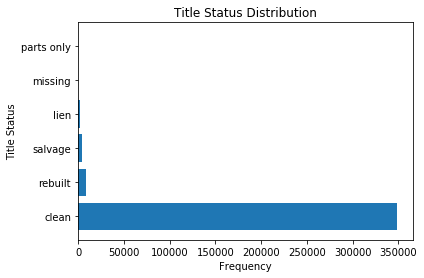

In [30]:
# See the distribution of unique values in the 'title_status' column:
plt.figure()
plt.barh(df_work2['title_status'].value_counts().index, 
         df_work2['title_status'].value_counts().values)
plt.title("Title Status Distribution")
plt.xlabel("Frequency")
plt.ylabel("Title Status")
plt.show()

In [31]:
# Filling in missing values in 'title_status' column:
df_work2['title_status'].fillna('missing', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.221374
condition       37.884687
cylinders       34.756611
paint_color     24.167469
drive           21.008498
type            18.167501
manufacturer     2.867243
transmission     0.847569
long             0.792340
lat              0.792340
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Let's do same with other valid columns too.

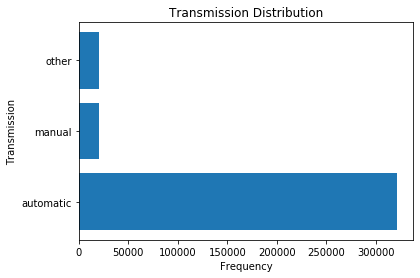

In [32]:
# See the distribution of unique values in the 'transmission' column:
plt.figure()
plt.barh(df_work2['transmission'].value_counts().index, 
         df_work2['transmission'].value_counts().values)
plt.title("Transmission Distribution")
plt.xlabel("Frequency")
plt.ylabel("Transmission")
plt.show()

In [33]:
# Filling in missing values in 'transmission' column:
df_work2['transmission'].fillna('other', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.221374
condition       37.884687
cylinders       34.756611
paint_color     24.167469
drive           21.008498
type            18.167501
manufacturer     2.867243
long             0.792340
lat              0.792340
transmission     0.000000
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

We can also see here that the `size` column has more than 66% of missing values in it. This is too much, and if we impute them, it would introduce a lot of bias into our model. So, it was decide to drop this column.

In [34]:
# Dropping the 'size' column: 
df_work2 = df_work2.drop(['size'], axis=1)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

condition       37.884687
cylinders       34.756611
paint_color     24.167469
drive           21.008498
type            18.167501
manufacturer     2.867243
long             0.792340
lat              0.792340
transmission     0.000000
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Let's see the distribution of values in the remaining missing value columns. 

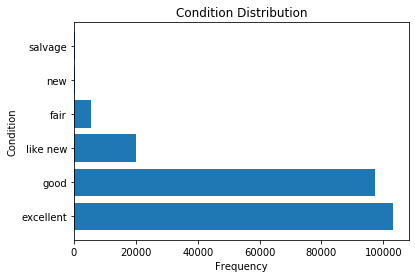

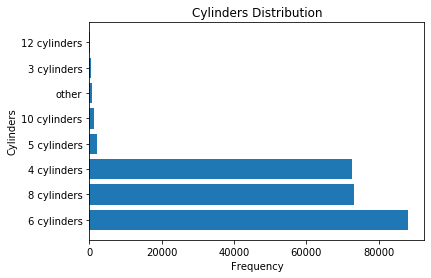

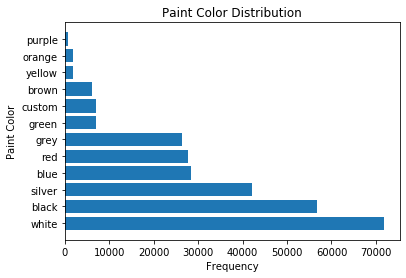

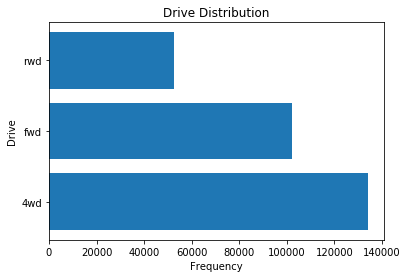

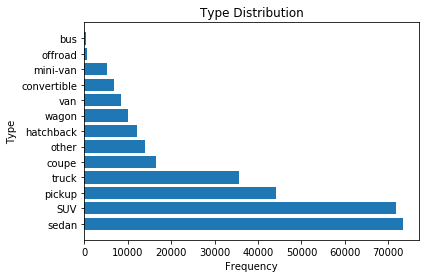

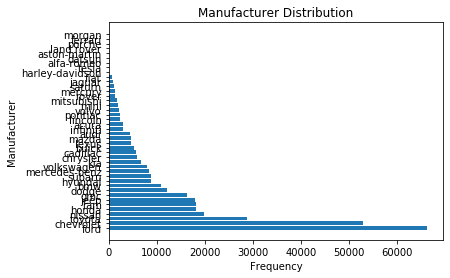

In [35]:
# See the distribution of unique values in the 'condition' column:
plt.figure()
plt.barh(df_work2['condition'].value_counts().index, 
         df_work2['condition'].value_counts().values)
plt.title("Condition Distribution")
plt.xlabel("Frequency")
plt.ylabel("Condition")
plt.show();

# See the distribution of unique values in the 'cylinders' column:
plt.figure()
plt.barh(df_work2['cylinders'].value_counts().index, 
         df_work2['cylinders'].value_counts().values)
plt.title("Cylinders Distribution")
plt.xlabel("Frequency")
plt.ylabel("Cylinders")
plt.show();

# See the distribution of unique values in the 'paint_color' column:
plt.figure()
plt.barh(df_work2['paint_color'].value_counts().index, 
         df_work2['paint_color'].value_counts().values)
plt.title("Paint Color Distribution")
plt.xlabel("Frequency")
plt.ylabel("Paint Color")
plt.show();

# See the distribution of unique values in the 'drive' column:
plt.figure()
plt.barh(df_work2['drive'].value_counts().index, 
         df_work2['drive'].value_counts().values)
plt.title("Drive Distribution")
plt.xlabel("Frequency")
plt.ylabel("Drive")
plt.show();

# See the distribution of unique values in the 'type' column:
plt.figure()
plt.barh(df_work2['type'].value_counts().index, 
         df_work2['type'].value_counts().values)
plt.title("Type Distribution")
plt.xlabel("Frequency")
plt.ylabel("Type")
plt.show();

# See the distribution of unique values in the 'manufacturer' column:
plt.figure()
plt.barh(df_work2['manufacturer'].value_counts().index, 
         df_work2['manufacturer'].value_counts().values)
plt.title("Manufacturer Distribution")
plt.xlabel("Frequency")
plt.ylabel("Manufacturer")
plt.show();

As we can see from the distribution charts above, we have few dominant values in each column, thus, assigning missing values as the most frequent value within the column would actually impose bias towards our model, especially when we the percentage of missing values is high (from 18% to 38%). Thus, it was decided to assign those missing values as a separate value. 

In [36]:
# Filling in missing values with new 'missing' name:
df_work2['condition'].fillna('missing', inplace=True)
df_work2['cylinders'].fillna('missing', inplace=True)
df_work2['paint_color'].fillna('missing', inplace=True)
df_work2['drive'].fillna('missing', inplace=True)
df_work2['type'].fillna('missing', inplace=True)
df_work2['manufacturer'].fillna('missing', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

long            0.79234
lat             0.79234
paint_color     0.00000
type            0.00000
drive           0.00000
transmission    0.00000
title_status    0.00000
odometer        0.00000
fuel            0.00000
cylinders       0.00000
condition       0.00000
manufacturer    0.00000
year            0.00000
price           0.00000
dtype: float64

In [37]:
# Let's drop na values of lat and long columns, as they are less than 1%:
df_work2.dropna(subset=['lat'], inplace=True)
df_work2.dropna(subset=['long'], inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

long            0.0
lat             0.0
paint_color     0.0
type            0.0
drive           0.0
transmission    0.0
title_status    0.0
odometer        0.0
fuel            0.0
cylinders       0.0
condition       0.0
manufacturer    0.0
year            0.0
price           0.0
dtype: float64

In [38]:
# Let's take a quick look at the correlation between our columns:
df_work2.corr().style.background_gradient()

,price,year,odometer,lat,long
price,1.000000,0.478164,-0.517035,0.036000,-0.149115
year,0.478164,1.000000,-0.466989,-0.003752,-0.017337
odometer,-0.517035,-0.466989,1.000000,0.026567,0.042387
lat,0.036000,-0.003752,0.026567,1.000000,-0.168342
long,-0.149115,-0.017337,0.042387,-0.168342,1.000000


From the correlation chart above, we can state that there is a strong positive correlation between `year` and `price`, which mean that the higher the year value, the higher would the price be. Also, there is a strong negative correlation between the `odometer` feature and the `price` value, meaning that with higher mileage distance, the price would be lower. Also, there is a negative correlation between `year` and `odometer` features, implying that the newer the car (higher year value) the less mileage it would have. All these correlations make sense realistically too.

We won't go deeply in exploring all these correlations, instead, we will explore the feature importance values after running some ml models later.

Now, after cleaning our dataset, let's convert our categorical features into numerical, so that we could run our models.

In [39]:
# Let's now convert our categorical columns into dummy variables:
df_work3 = pd.get_dummies(df_work2)

# Let's reset index, and remove all the spaces within column names and make them all lowercase (in case if there are some uppercase letters):
df_work3.columns = df_work3.columns.str.replace(' ', '_')
df_work3.columns = map(str.lower, df_work3.columns)

# Resetting index:
df_work3 = df_work3.reset_index().drop(columns = ['index']).copy()
print('The shape of our new dataframe is: ', df_work3.shape)
print()
df_work3.head()

The shape of our new dataframe is:  (362854, 109)



,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have our clean processed dataframe. Let's move onto the modelling part.

Again, please note, there will be another notebook provided for the Neural Network modelling part.

## Part 2: Modelling

### 2.1. Linear Regression

In [39]:
# ScikitLearn Linear Regression (default values):

# Assigning data (X) and target (y) columns:
X_lm = df_work3.loc[:, df_work3.columns != 'price']
y_lm = df_work3['price']

print('X_lm shape:', X_lm.shape)
print('y_lm shape:', y_lm.shape)

# Let's split our dataframe into train and test sets:
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_lm, y_lm, test_size = 0.2, random_state=1)

print('X_lm_train shape:', X_lm_train.shape)
print('y_lm_train shape:', y_lm_train.shape)
print('X_lm_test shape:', X_lm_test.shape)
print('y_lm_test shape:', y_lm_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myLM = LinearRegression()

# 2. Fit the model:
myLM.fit(X_lm_train, y_lm_train)

# 3. Make prediction (will use it for mae):
y_lm_test_pred = myLM.predict(X_lm_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lm_test, y_lm_test_pred))
print("The mean value of the price column is: ", y_lm_test.mean())
print("The train set R^2 of our model is: ", round(myLM.score(X_lm_train,y_lm_train),4))
print("The test set R^2 of our model is: ", round(myLM.score(X_lm_test,y_lm_test),4))

X_lm shape: (362854, 108)
y_lm shape: (362854,)
X_lm_train shape: (290283, 108)
y_lm_train shape: (290283,)
X_lm_test shape: (72571, 108)
y_lm_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.351827470891
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6721
The test set R^2 of our model is:  0.6733


In [40]:
# Let's now run the same model but with scaling first, it's advised to do so for better user interpretability: 
# ScikitLearn Linear Regression (with Standard Scaler):

# Assigning data (X) and target (y) columns:
X_lm = df_work3.loc[:, df_work3.columns != 'price']
y_lm = df_work3['price']

print('X_lm shape:', X_lm.shape)
print('y_lm shape:', y_lm.shape)

# Let's split our dataframe into train and test sets:
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_lm, y_lm, test_size = 0.2, random_state=1)

print('X_lm_train shape:', X_lm_train.shape)
print('y_lm_train shape:', y_lm_train.shape)
print('X_lm_test shape:', X_lm_test.shape)
print('y_lm_test shape:', y_lm_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lm_train)
X_lm_train = scaler.transform(X_lm_train)
X_lm_test = scaler.transform(X_lm_test)

# 1. Instantiate the model:
myLM = LinearRegression()

# 2. Fit the model:
myLM.fit(X_lm_train, y_lm_train)

# 3. Make prediction (will use it for mae):
y_lm_test_pred = myLM.predict(X_lm_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lm_test, y_lm_test_pred))
print("The mean value of the price column is: ", y_lm_test.mean())
print("The train set R^2 of our model is: ", round(myLM.score(X_lm_train,y_lm_train),4))
print("The test set R^2 of our model is: ", round(myLM.score(X_lm_test,y_lm_test),4))

X_lm shape: (362854, 108)
y_lm shape: (362854,)
X_lm_train shape: (290283, 108)
y_lm_train shape: (290283,)
X_lm_test shape: (72571, 108)
y_lm_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.4628825562563
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.672
The test set R^2 of our model is:  0.6732


### 2.2. Ridge Regression

In [41]:
# ScikitLearn Ridge Regression (with Standard Scaler):

# Assigning data (X) and target (y) columns:
X_rr = df_work3.loc[:, df_work3.columns != 'price']
y_rr = df_work3['price']

print('X_rr shape:', X_rr.shape)
print('y_rr shape:', y_rr.shape)

# Let's split our dataframe into train and test sets:
X_rr_train, X_rr_test, y_rr_train, y_rr_test = train_test_split(X_rr, y_rr, test_size = 0.2, random_state=1)

print('X_rr_train shape:', X_rr_train.shape)
print('y_rr_train shape:', y_rr_train.shape)
print('X_rr_test shape:', X_rr_test.shape)
print('y_rr_test shape:', y_rr_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lm_train)
X_lm_train = scaler.transform(X_lm_train)
X_lm_test = scaler.transform(X_lm_test)

# 1. Instantiate the model
myRR = Ridge()

# 2. Fit the model
myRR.fit(X_rr_train, y_rr_train)

# 3. Make prediction (will use it for mae)
y_rr_test_pred = myRR.predict(X_rr_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rr_test, y_rr_test_pred))
print("The mean value of the price column is: ", y_rr_test.mean())
print("The train set R^2 of our model is: ", round(myRR.score(X_rr_train,y_rr_train),4))
print("The test set R^2 of our model is: ", round(myRR.score(X_rr_test,y_rr_test),4))

X_rr shape: (362854, 108)
y_rr shape: (362854,)
X_rr_train shape: (290283, 108)
y_rr_train shape: (290283,)
X_rr_test shape: (72571, 108)
y_rr_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.553516533962
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.672
The test set R^2 of our model is:  0.6733


### 2.3. RidgeCV Regression 

In [42]:
# Scikit Learn RidgeCV Regression (cv=5):

# Assigning data (X) and target (y) columns:
X_rrcv = df_work3.loc[:, df_work3.columns != 'price']
y_rrcv = df_work3['price']

print('X_rrcv shape:', X_rrcv.shape)
print('y_rrcv shape:', y_rrcv.shape)

# Let's split our dataframe into train and test sets:
X_rrcv_train, X_rrcv_test, y_rrcv_train, y_rrcv_test = train_test_split(X_rrcv, y_rrcv, test_size = 0.2, random_state=1)

print('X_rrcv_train shape:', X_rrcv_train.shape)
print('y_rrcv_train shape:', y_rrcv_train.shape)
print('X_rrcv_test shape:', X_rrcv_test.shape)
print('y_rrcv_test shape:', y_rrcv_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myRRCV = RidgeCV(cv=5)

# 2. Fit the model:
myRRCV.fit(X_rrcv_train, y_rrcv_train)

# 3. Make prediction (will use it for mae):
y_rrcv_test_pred = myRRCV.predict(X_rrcv_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rrcv_test, y_rrcv_test_pred))
print("The mean value of the price column is: ", y_rrcv_test.mean())
print("The train set R^2 of our model is: ", round(myRRCV.score(X_rrcv_train,y_rrcv_train),4))
print("The test set R^2 of our model is: ", round(myRRCV.score(X_rrcv_test,y_rrcv_test),4))

X_rrcv shape: (362854, 108)
y_rrcv shape: (362854,)
X_rrcv_train shape: (290283, 108)
y_rrcv_train shape: (290283,)
X_rrcv_test shape: (72571, 108)
y_rrcv_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.375520728161
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6721
The test set R^2 of our model is:  0.6733


In [43]:
# Scikit Learn RidgeCV Regression (cv=5, alphas updated):

# Assigning data (X) and target (y) columns:
X_rrcv = df_work3.loc[:, df_work3.columns != 'price']
y_rrcv = df_work3['price']

print('X_rrcv shape:', X_rrcv.shape)
print('y_rrcv shape:', y_rrcv.shape)

# Let's split our dataframe into train and test sets:
X_rrcv_train, X_rrcv_test, y_rrcv_train, y_rrcv_test = train_test_split(X_rrcv, y_rrcv, test_size = 0.2, random_state=1)

print('X_rrcv_train shape:', X_rrcv_train.shape)
print('y_rrcv_train shape:', y_rrcv_train.shape)
print('X_rrcv_test shape:', X_rrcv_test.shape)
print('y_rrcv_test shape:', y_rrcv_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myRRCV = RidgeCV(alphas=[0.001, 0.01, 0,1, 1, 2, 4, 6, 8, 10, 15, 20], cv=5)

# 2. Fit the model:
myRRCV.fit(X_rrcv_train, y_rrcv_train)

# 3. Make prediction (will use it for mae):
y_rrcv_test_pred = myRRCV.predict(X_rrcv_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rrcv_test, y_rrcv_test_pred))
print("The mean value of the price column is: ", y_rrcv_test.mean())
print("The train set R^2 of our model is: ", round(myRRCV.score(X_rrcv_train,y_rrcv_train),4))
print("The test set R^2 of our model is: ", round(myRRCV.score(X_rrcv_test,y_rrcv_test),4))

X_rrcv shape: (362854, 108)
y_rrcv shape: (362854,)
X_rrcv_train shape: (290283, 108)
y_rrcv_train shape: (290283,)
X_rrcv_test shape: (72571, 108)
y_rrcv_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.354253659961
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6721
The test set R^2 of our model is:  0.6733


In [44]:
# Let's view the best alpha value:
print('Best alpha value is: ', myRRCV.alpha_)

Best alpha value is:  0.01


### 2.4. Lasso Regression 

In [45]:
# ScikitLearn Lasso Regression:

# Assigning data (X) and target (y) columns:
X_lr = df_work3.loc[:, df_work3.columns != 'price']
y_lr = df_work3['price']

print('X_lr shape:', X_lr.shape)
print('y_lr shape:', y_lr.shape)

# Let's split our dataframe into train and test sets:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state=1)

print('X_lr_train shape:', X_lr_train.shape)
print('y_lr_train shape:', y_lr_train.shape)
print('X_lr_test shape:', X_lr_test.shape)
print('y_lr_test shape:', y_lr_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myLasso = Lasso(alpha=0.001)

# 2. Fit the model:
myLasso.fit(X_lr_train, y_lr_train)

# 3. Make prediction (will use it for mae):
y_lr_test_pred = myLasso.predict(X_lr_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lr_test, y_lr_test_pred))
print("The mean value of the price column is: ", y_lr_test.mean())
print("The train set R^2 of our model is: ", round(myLasso.score(X_lr_train,y_lr_train),4))
print("The test set R^2 of our model is: ", round(myLasso.score(X_lr_test,y_lr_test),4))

X_lr shape: (362854, 108)
y_lr shape: (362854,)
X_lr_train shape: (290283, 108)
y_lr_train shape: (290283,)
X_lr_test shape: (72571, 108)
y_lr_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.3528586599778
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6721
The test set R^2 of our model is:  0.6733


In [46]:
# ScikitLearn Lasso Regression (with StandardScaler and max_iter=10,000):

# Assigning data (X) and target (y) columns:
X_lr = df_work3.loc[:, df_work3.columns != 'price']
y_lr = df_work3['price']

print('X_lr shape:', X_lr.shape)
print('y_lr shape:', y_lr.shape)

# Let's split our dataframe into train and test sets:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state=1)

print('X_lr_train shape:', X_lr_train.shape)
print('y_lr_train shape:', y_lr_train.shape)
print('X_lr_test shape:', X_lr_test.shape)
print('y_lr_test shape:', y_lr_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lr_train)
X_lr_train = scaler.transform(X_lr_train)
X_lr_test = scaler.transform(X_lr_test)

# 1. Instantiate the model:
myLasso = Lasso(alpha=0.001, max_iter=10000)

# 2. Fit the model:
myLasso.fit(X_lr_train, y_lr_train)

# 3. Make prediction (will use it for mae):
y_lr_test_pred = myLasso.predict(X_lr_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lr_test, y_lr_test_pred))
print("The mean value of the price column is: ", y_lr_test.mean())
print("The train set R^2 of our model is: ", round(myLasso.score(X_lr_train,y_lr_train),4))
print("The test set R^2 of our model is: ", round(myLasso.score(X_lr_test,y_lr_test),4))

X_lr shape: (362854, 108)
y_lr shape: (362854,)
X_lr_train shape: (290283, 108)
y_lr_train shape: (290283,)
X_lr_test shape: (72571, 108)
y_lr_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.3517592781077
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6721
The test set R^2 of our model is:  0.6733


In [47]:
# Let's now run the Lasso Regression model with different alpha values and see how our R^2 scores change:
train_scores_lr = []
test_scores_lr = []

alpha_values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10] 

for a in alpha_values:
    
    myLasso = Lasso(alpha=a)
    myLasso.fit(X_lr_train, y_lr_train)
    
    train_scores_lr.append(myLasso.score(X_lr_train,y_lr_train))
    test_scores_lr.append(myLasso.score(X_lr_test,y_lr_test))
    
    print(f'Train set R^2 score with alpha={a}: {myLasso.score(X_lr_train,y_lr_train)}')
    print(f'Validation set R^2 score with alpha={a}: {myLasso.score(X_lr_test,y_lr_test)}')
    print()

Train set R^2 score with alpha=0.001: 0.6720717664344774
Validation set R^2 score with alpha=0.001: 0.6732734301163493

Train set R^2 score with alpha=0.01: 0.6720717663360171
Validation set R^2 score with alpha=0.01: 0.673273392071866

Train set R^2 score with alpha=0.05: 0.672071763934895
Validation set R^2 score with alpha=0.05: 0.6732732840529876

Train set R^2 score with alpha=0.1: 0.6720717566505943
Validation set R^2 score with alpha=0.1: 0.6732730807677311

Train set R^2 score with alpha=0.2: 0.6720717284754935
Validation set R^2 score with alpha=0.2: 0.673272611743324

Train set R^2 score with alpha=0.4: 0.6720716181301759
Validation set R^2 score with alpha=0.4: 0.6732719150122639

Train set R^2 score with alpha=0.6: 0.6720714330371761
Validation set R^2 score with alpha=0.6: 0.6732709833399848

Train set R^2 score with alpha=0.8: 0.6720711737973737
Validation set R^2 score with alpha=0.8: 0.6732700072662886

Train set R^2 score with alpha=1: 0.6720708387401505
Validation set

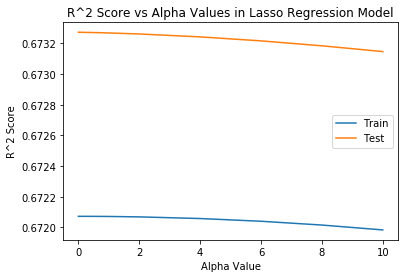

In [48]:
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Alpha Values in Lasso Regression Model")
plt.plot(alpha_values, train_scores_lr, label="Train")
plt.plot(alpha_values, test_scores_lr, label="Test")
plt.legend()
plt.xlabel("Alpha Value")
plt.ylabel("R^2 Score")
plt.show()

### 2.5. LassoCV Regression 

In [49]:
# ScikitLearn LassoCV Regression (default values):

# Assigning data (X) and target (y) columns:
X_lrcv = df_work3.loc[:, df_work3.columns != 'price']
y_lrcv = df_work3['price']

print('X_lrcv shape:', X_lrcv.shape)
print('y_lrcv shape:', y_lrcv.shape)

# Let's split our dataframe into train and test sets:
X_lrcv_train, X_lrcv_test, y_lrcv_train, y_lrcv_test = train_test_split(X_lrcv, y_lrcv, test_size = 0.2, random_state=1)

print('X_lrcv_train shape:', X_lrcv_train.shape)
print('y_lrcv_train shape:', y_lrcv_train.shape)
print('X_lrcv_test shape:', X_lrcv_test.shape)
print('y_lrcv_test shape:', y_lrcv_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_lrcv_train)
X_lrcv_train = scaler.transform(X_lrcv_train)
X_lrcv_test = scaler.transform(X_lrcv_test)

# 1. Instantiate the model:
myLassoCV = LassoCV()

# 2. Fit the model:
myLassoCV.fit(X_lrcv_train, y_lrcv_train)

# 3. Make prediction (will use it for mae):
y_lrcv_test_pred = myLassoCV.predict(X_lrcv_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lrcv_test, y_lrcv_test_pred))
print("The mean value of the price column is: ", y_lrcv_test.mean())
print("The train set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_train,y_lrcv_train),4))
print("The test set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_test,y_lrcv_test),4))

X_lrcv shape: (362854, 108)
y_lrcv shape: (362854,)
X_lrcv_train shape: (290283, 108)
y_lrcv_train shape: (290283,)
X_lrcv_test shape: (72571, 108)
y_lrcv_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3993.4367784085175
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.672
The test set R^2 of our model is:  0.6732


In [50]:
# ScikitLearn LassoCV Regression (custom values):

# 1. Instantiate the model:
myLassoCV = LassoCV(normalize=True, cv=5, random_state=1)

# 2. Fit the model:
myLassoCV.fit(X_lrcv_train, y_lrcv_train)

# 3. Make prediction (will use it for mae):
y_lrcv_test_pred = myLassoCV.predict(X_lrcv_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_lrcv_test, y_lrcv_test_pred))
print("The mean value of the price column is: ", y_lrcv_test.mean())
print("The train set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_train,y_lrcv_train),4))
print("The test set R^2 of our model is: ", round(myLassoCV.score(X_lrcv_test,y_lrcv_test),4))

The mean absolute error of our model is:  3993.4367784085175
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.672
The test set R^2 of our model is:  0.6732


In [51]:
# Let's view the best alpha value:
print('Best alpha value is: ', myLassoCV.alpha_)

Best alpha value is:  0.009389603637139544


### 2.6. Elastic Regression 

In [52]:
# ScikitLearn Elastic Regression (default values):

# Assigning data (X) and target (y) columns:
X_elr = df_work3.loc[:, df_work3.columns != 'price']
y_elr = df_work3['price']

print('X_elr shape:', X_elr.shape)
print('y_elr shape:', y_elr.shape)

# Let's split our dataframe into train and test sets:
X_elr_train, X_elr_test, y_elr_train, y_elr_test = train_test_split(X_elr, y_elr, test_size = 0.2, random_state=1)

print('X_elr_train shape:', X_elr_train.shape)
print('y_elr_train shape:', y_elr_train.shape)
print('X_elr_test shape:', X_elr_test.shape)
print('y_elr_test shape:', y_elr_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_elr_train)
X_elr_train = scaler.transform(X_elr_train)
X_elr_test = scaler.transform(X_elr_test)

# 1. Instantiate the model:
myER = ElasticNet()

# 2. Fit the model:
myER.fit(X_elr_train, y_elr_train)

# 3. Make prediction (will use it for mae):
y_elr_test_pred = myER.predict(X_elr_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_elr_test, y_elr_test_pred))
print("The mean value of the price column is: ", y_elr_test.mean())
print("The train set R^2 of our model is: ", round(myER.score(X_elr_train,y_elr_train),4))
print("The test set R^2 of our model is: ", round(myER.score(X_elr_test,y_elr_test),4))

X_elr shape: (362854, 108)
y_elr shape: (362854,)
X_elr_train shape: (290283, 108)
y_elr_train shape: (290283,)
X_elr_test shape: (72571, 108)
y_elr_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  4313.34217965821
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6298
The test set R^2 of our model is:  0.6295


Train set R^2 score with alpha=0.0001: 0.6720717654877923
Validation set R^2 score with alpha=0.0001: 0.6732731935522975

Train set R^2 score with alpha=0.0005: 0.6720717418624943
Validation set R^2 score with alpha=0.0005: 0.6732721612273167

Train set R^2 score with alpha=0.001: 0.672071668125087
Validation set R^2 score with alpha=0.001: 0.673270837991164

Train set R^2 score with alpha=0.005: 0.672069320088494
Validation set R^2 score with alpha=0.005: 0.6732585340507242

Train set R^2 score with alpha=0.01: 0.6720620376010366
Validation set R^2 score with alpha=0.01: 0.6732388876271522

Train set R^2 score with alpha=0.05: 0.6718393607869966
Validation set R^2 score with alpha=0.05: 0.6729204266017303

Train set R^2 score with alpha=0.1: 0.6711917006588981
Validation set R^2 score with alpha=0.1: 0.6721603771458399

Train set R^2 score with alpha=0.2: 0.668896967897805
Validation set R^2 score with alpha=0.2: 0.6696624451886164

Train set R^2 score with alpha=0.4: 0.66152525533385

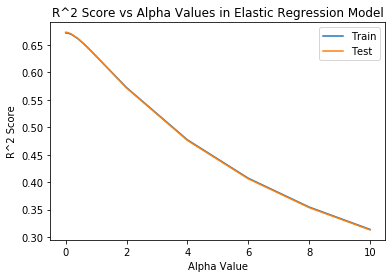

In [53]:
# Let's now run the Elastic Regression model (max_iter=10,000) with different alpha values and see how our R^2 scores change:
train_scores_er = []
test_scores_er = []

alpha_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10] 

for a in alpha_values:
    
    myER = ElasticNet(alpha=a, max_iter=10000)
    myER.fit(X_elr_train, y_elr_train)
    
    train_scores_er.append(myER.score(X_elr_train,y_elr_train))
    test_scores_er.append(myER.score(X_elr_test,y_elr_test))
    
    print(f'Train set R^2 score with alpha={a}: {myER.score(X_elr_train,y_elr_train)}')
    print(f'Validation set R^2 score with alpha={a}: {myER.score(X_elr_test,y_elr_test)}')
    print()
    

# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Alpha Values in Elastic Regression Model")
plt.plot(alpha_values, train_scores_er, label="Train")
plt.plot(alpha_values, test_scores_er, label="Test")
plt.legend()
plt.xlabel("Alpha Value")
plt.ylabel("R^2 Score")
plt.show()

In [48]:
# ScikitLearn Elastic Regression (adjusted parameters):

# Assigning data (X) and target (y) columns:
X_elr = df_work3.loc[:, df_work3.columns != 'price']
y_elr = df_work3['price']

print('X_elr shape:', X_elr.shape)
print('y_elr shape:', y_elr.shape)

# Let's split our dataframe into train and test sets:
X_elr_train, X_elr_test, y_elr_train, y_elr_test = train_test_split(X_elr, y_elr, test_size = 0.2, random_state=1)

print('X_elr_train shape:', X_elr_train.shape)
print('y_elr_train shape:', y_elr_train.shape)
print('X_elr_test shape:', X_elr_test.shape)
print('y_elr_test shape:', y_elr_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_elr_train)
X_elr_train = scaler.transform(X_elr_train)
X_elr_test = scaler.transform(X_elr_test)

# 1. Instantiate the model:
myER = ElasticNet(alpha=0.0001, max_iter=10000)

# 2. Fit the model:
myER.fit(X_elr_train, y_elr_train)

# 3. Make prediction (will use it for mae):
y_elr_test_pred = myER.predict(X_elr_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_elr_test, y_elr_test_pred))
print("The mean value of the price column is: ", y_elr_test.mean())
print("The train set R^2 of our model is: ", round(myER.score(X_elr_train,y_elr_train),4))
print("The test set R^2 of our model is: ", round(myER.score(X_elr_test,y_elr_test),4))

X_elr shape: (362854, 108)
y_elr shape: (362854,)
X_elr_train shape: (290283, 108)
y_elr_train shape: (290283,)
X_elr_test shape: (72571, 108)
y_elr_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3994.353900245437
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6721
The test set R^2 of our model is:  0.6733


We can see that all the linear models gave us an R^2 score for the test set at around 0.67, not the best scores. Let's actually move on to some advanced machine learning models.

### 2.7. KNN Regression 

In [55]:
# ScikitLearn KNN Regression (default values):

# Assigning data (X) and target (y) columns:
X_knn = df_work3.loc[:, df_work3.columns != 'price']
y_knn = df_work3['price']

print('X_knn shape:', X_knn.shape)
print('y_knn shape:', y_knn.shape)

# Let's split our dataframe into train and test sets:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state=1)

print('X_knn_train shape:', X_knn_train.shape)
print('y_knn_train shape:', y_knn_train.shape)
print('X_knn_test shape:', X_knn_test.shape)
print('y_knn_test shape:', y_knn_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_knn_train)
X_knn_train = scaler.transform(X_knn_train)
X_knn_test = scaler.transform(X_knn_test)

# 1. Instantiate the model:
myKNN = KNeighborsRegressor()

# 2. Fit the model:
myKNN.fit(X_knn_train, y_knn_train)

# 3. Make prediction (will use it for mae):
y_knn_test_pred = myKNN.predict(X_knn_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_knn_test, y_knn_test_pred))
print("The mean value of the price column is: ", y_knn_test.mean())
print("The train set R^2 of our model is: ", round(myKNN.score(X_knn_train,y_knn_train),4))
print("The test set R^2 of our model is: ", round(myKNN.score(X_knn_test,y_knn_test),4))

# Saving our model:
joblib.dump(myKNN, 'myKNN.pkl')

X_knn shape: (362854, 108)
y_knn shape: (362854,)
X_knn_train shape: (290283, 108)
y_knn_train shape: (290283,)
X_knn_test shape: (72571, 108)
y_knn_test shape: (72571,)
---------------------------------------------------------------
The mean absolute error of our model is:  3141.0855245208145
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.8415
The test set R^2 of our model is:  0.7477


['myKNN.pkl']

#### 2.7.1. KNN Regression: Hyperparameter Optimization

In [56]:
# ScikitLearn KNN Regression (weights='distance'):

# Assigning data (X) and target (y) columns:
X_knn = df_work3.loc[:, df_work3.columns != 'price']
y_knn = df_work3['price']

print('X_knn shape:', X_knn.shape)
print('y_knn shape:', y_knn.shape)

# Let's split our dataframe into train and test sets:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state=1)

print('X_knn_train shape:', X_knn_train.shape)
print('y_knn_train shape:', y_knn_train.shape)
print('X_knn_test shape:', X_knn_test.shape)
print('y_knn_test shape:', y_knn_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_knn_train)
X_knn_train = scaler.transform(X_knn_train)
X_knn_test = scaler.transform(X_knn_test)

# 1. Instantiate the model:
myKNN = KNeighborsRegressor(weights='distance')

# 2. Fit the model:
myKNN.fit(X_knn_train, y_knn_train)

# 3. Make prediction (will use it for mae):
y_knn_test_pred = myKNN.predict(X_knn_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_knn_test, y_knn_test_pred))
print("The mean value of the price column is: ", y_knn_test.mean())
print("The train set R^2 of our model is: ", round(myKNN.score(X_knn_train,y_knn_train),4))
print("The test set R^2 of our model is: ", round(myKNN.score(X_knn_test,y_knn_test),4))

X_knn shape: (362854, 108)
y_knn shape: (362854,)
X_knn_train shape: (290283, 108)
y_knn_train shape: (290283,)
X_knn_test shape: (72571, 108)
y_knn_test shape: (72571,)
---------------------------------------------------------------
The mean absolute error of our model is:  2376.552643539577
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.9995
The test set R^2 of our model is:  0.8003



In [57]:
# Saving our model:
joblib.dump(myKNN, 'myKNN_weights.pkl')

['myKNN_weights.pkl']

We can clearly see that with hyperparameter `weights='distance'` the R^2 score improved from 0.748 to 0.80.

X_knn_small shape: (108856, 108)
y_knn_small shape: (108856,)
X_knn_small_train shape: (87084, 108)
y_knn_small_train shape: (87084,)
X_knn_small_test shape: (21772, 108)
y_knn_small_test shape: (21772,)
---------------------------------------------------------------
Train set R^2 score with k_value=1: 0.9996587482447327
Test set R^2 score with k_value=1: 0.5756948315432036
Train set R^2 score with k_value=3: 0.999814482877036
Test set R^2 score with k_value=3: 0.6814111938210651
Train set R^2 score with k_value=5: 0.9998188027143134
Test set R^2 score with k_value=5: 0.7028746469505541
Train set R^2 score with k_value=7: 0.9998193293655618
Test set R^2 score with k_value=7: 0.7089105294953644
Train set R^2 score with k_value=9: 0.9998199912855434
Test set R^2 score with k_value=9: 0.7115388726034837
Train set R^2 score with k_value=11: 0.9998200398083198
Test set R^2 score with k_value=11: 0.7114329110962208


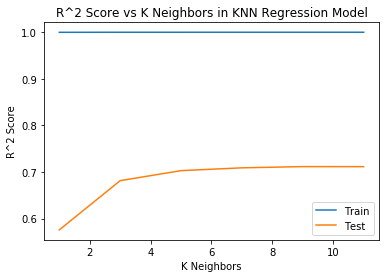

In [58]:
# ScikitLearn KNN Regression (finding optimal k_neighbors):

# Let's actually create a subset of our dataframe, and see how different k_neigbors affect our R^2 score:
df_knn_small = df_work3.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns:
X_knn_small = df_knn_small.loc[:, df_knn_small.columns != 'price']
y_knn_small = df_knn_small['price']

print('X_knn_small shape:', X_knn_small.shape)
print('y_knn_small shape:', y_knn_small.shape)

# Let's split our dataframe into train and test sets:
X_knn_small_train, X_knn_small_test, y_knn_small_train, y_knn_small_test = train_test_split(X_knn_small, y_knn_small, test_size = 0.2, random_state=1)

print('X_knn_small_train shape:', X_knn_small_train.shape)
print('y_knn_small_train shape:', y_knn_small_train.shape)
print('X_knn_small_test shape:', X_knn_small_test.shape)
print('y_knn_small_test shape:', y_knn_small_test.shape)
print("---------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_knn_small_train)
X_knn_small_train = scaler.transform(X_knn_small_train)
X_knn_small_test = scaler.transform(X_knn_small_test)

# Running through loop:
train_scores_knn = []
test_scores_knn = []

k_values = list(range(1, 12, 2))

for k in k_values:
    
    myKNN = KNeighborsRegressor(n_neighbors=k, weights='distance')
    myKNN.fit(X_knn_small_train, y_knn_small_train)
    
    train_scores_knn.append(myKNN.score(X_knn_small_train,y_knn_small_train))
    test_scores_knn.append(myKNN.score(X_knn_small_test,y_knn_small_test))
    
    print(f'Train set R^2 score with k_value={k}: {myKNN.score(X_knn_small_train,y_knn_small_train)}')
    print(f'Test set R^2 score with k_value={k}: {myKNN.score(X_knn_small_test,y_knn_small_test)}')
    
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs K Neighbors in KNN Regression Model")
plt.plot(k_values, train_scores_knn, label="Train")
plt.plot(k_values, test_scores_knn, label="Test")
plt.legend()
plt.xlabel("K Neighbors")
plt.ylabel("R^2 Score")
plt.show()

We can see here that after `n_neignors=5`, which is the default number of the KNeighborsRegressor model, the score doesn't improve by too much. So, we'll just leave our model as is, and move onto trying other models now.

### 2.8. Decision Tree Regression 

In [59]:
# ScikitLearn DT Regression (default values). We won't be doing scaling for tree based models, as it is not required.

# Assigning data (X) and target (y) columns:
X_dt = df_work3.loc[:, df_work3.columns != 'price']
y_dt = df_work3['price']

print('X_dt shape:', X_dt.shape)
print('y_dt shape:', y_dt.shape)

# Let's split our dataframe into train and test sets:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.2, random_state=1)

print('X_dt_train shape:', X_dt_train.shape)
print('y_dt_train shape:', y_dt_train.shape)
print('X_dt_test shape:', X_dt_test.shape)
print('y_dt_test shape:', y_dt_test.shape)
print("----------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myDT = DecisionTreeRegressor()

# 2. Fit the model:
myDT.fit(X_dt_train, y_dt_train)

# 3. Make prediction (will use it for mae):
y_dt_test_pred = myDT.predict(X_dt_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_dt_test, y_dt_test_pred))
print("The mean value of the price column is: ", y_dt_test.mean())
print("The train set R^2 of our model is: ", round(myDT.score(X_dt_train,y_dt_train),4))
print("The test set R^2 of our model is: ", round(myDT.score(X_dt_test,y_dt_test),4))

# Saving our model:
joblib.dump(myDT, 'myDT.pkl')

X_dt shape: (362854, 108)
y_dt shape: (362854,)
X_dt_train shape: (290283, 108)
y_dt_train shape: (290283,)
X_dt_test shape: (72571, 108)
y_dt_test shape: (72571,)
----------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  2167.3224430448863
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.9995
The test set R^2 of our model is:  0.8065


['myDT.pkl']

In [61]:
# Let's see what was the best max_depth parameter for our DT model (note: this is a max_depth which gave the highest score on train set, not test):
myDT.get_depth()

68

#### 2.8.1. Decision Tree Regression: Hyperparameter Optimization

X_dt shape: (362854, 108)
y_dt shape: (362854,)
X_dt_train shape: (290283, 108)
y_dt_train shape: (290283,)
X_dt_test shape: (72571, 108)
y_dt_test shape: (72571,)
----------------------------------------------------------------------------------------------------------
The mean absolute error of our model with max_depth=3: 4933.189766055643
The mean value of the price column is:  14254.943448484932
Train set R^2 score with max_depth=3: 0.5388217594331539
Test set R^2 score with max_depth=3: 0.5378984128732367

The mean absolute error of our model with max_depth=5: 4250.028268805613
The mean value of the price column is:  14254.943448484932
Train set R^2 score with max_depth=5: 0.6422643773232147
Test set R^2 score with max_depth=5: 0.6409484515784782

The mean absolute error of our model with max_depth=7: 3744.287779376935
The mean value of the price column is:  14254.943448484932
Train set R^2 score with max_depth=7: 0.7053494578563954
Test set R^2 score with max_depth=7: 0.704087402

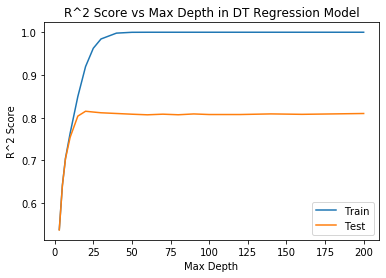

In [65]:
# ScikitLearn DT Regression (finding optimal max_depth):

# Assigning data (X) and target (y) columns:
X_dt = df_work3.loc[:, df_work3.columns != 'price']
y_dt = df_work3['price']

print('X_dt shape:', X_dt.shape)
print('y_dt shape:', y_dt.shape)

# Let's split our dataframe into train and test sets:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.2, random_state=1)

print('X_dt_train shape:', X_dt_train.shape)
print('y_dt_train shape:', y_dt_train.shape)
print('X_dt_test shape:', X_dt_test.shape)
print('y_dt_test shape:', y_dt_test.shape)
print("----------------------------------------------------------------------------------------------------------")


# Running through loop:
train_scores_dt = []
test_scores_dt = []

depth = [3,5,7,10,15,20,25,30,40,50,60,70,80,90,100,120,140,160,200]

for d in depth:
    # 1. Instantiate the model:
    myDT = DecisionTreeRegressor(max_depth=d)

    # 2. Fit the model:
    myDT.fit(X_dt_train, y_dt_train)
    
    train_scores_dt.append(myDT.score(X_dt_train,y_dt_train))
    test_scores_dt.append(myDT.score(X_dt_test,y_dt_test))
    
    # 3. Make prediction (will use it for mae):
    y_dt_test_pred = myDT.predict(X_dt_test)

    # 4. R^2 score check:
    print(f'The mean absolute error of our model with max_depth={d}: {mae(y_dt_test, y_dt_test_pred)}')
    print("The mean value of the price column is: ", y_dt_test.mean())
    print(f'Train set R^2 score with max_depth={d}: {myDT.score(X_dt_train,y_dt_train)}')
    print(f'Test set R^2 score with max_depth={d}: {myDT.score(X_dt_test,y_dt_test)}')
    print()

# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Max Depth in DT Regression Model")
plt.plot(depth, train_scores_dt, label="Train")
plt.plot(depth, test_scores_dt, label="Test")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("R^2 Score")
plt.show()

We can see that at the `max_depth=20` we get highest possible R^2 score for our test set - 0.815, and after that model starts to overfit, where train set's scores become better, but test set's scores keep around same level. But as for the MAE metric results, we can see that the optimal we got is at max_depth=40, where MAE is 2166, and R^2 score for the tes set is 0.81. Let's continue with training other models and look for the best possible results.

### 2.9. LinearSVR Regression 

In [54]:
# ScikitLearn LinearSVR Regression (default values):

# Assigning data (X) and target (y) columns:
X_svr = df_work3.loc[:, df_work3.columns != 'price']
y_svr = df_work3['price']

print('X_svr shape:', X_svr.shape)
print('y_svr shape:', y_svr.shape)

# Let's split our dataframe into train and test sets:
X_svr_train, X_svr_test, y_svr_train, y_svr_test = train_test_split(X_svr, y_svr, test_size = 0.2, random_state=1)

print('X_svr_train shape:', X_svr_train.shape)
print('y_svr_train shape:', y_svr_train.shape)
print('X_svr_test shape:', X_svr_test.shape)
print('y_svr_test shape:', y_svr_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")

# Scale and Transform data:
scaler = StandardScaler()
scaler.fit(X_svr_train)
X_svr_train = scaler.transform(X_svr_train)
X_svr_test = scaler.transform(X_svr_test)

# 1. Instantiate the model:
mySVR = LinearSVR()

# 2. Fit the model:
mySVR.fit(X_svr_train, y_svr_train)
 
# 3. Make prediction (will use it for mae):
y_svr_test_pred = mySVR.predict(X_svr_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_svr_test, y_svr_test_pred))
print("The mean value of the price column is: ", y_svr_test.mean())
print("The train set R^2 of our model is: ", round(mySVR.score(X_svr_train,y_svr_train),4))
print("The test set R^2 of our model is: ", round(mySVR.score(X_svr_test,y_svr_test),4))

X_svr shape: (362854, 108)
y_svr shape: (362854,)
X_svr_train shape: (290283, 108)
y_svr_train shape: (290283,)
X_svr_test shape: (72571, 108)
y_svr_test shape: (72571,)
--------------------------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3897.144329949029
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.643
The test set R^2 of our model is:  0.6431


#### 2.9.1. LinearSVR Regression: Hyperparameter Optimization

Result for the C= 1
The mean absolute error of our model is:  3895.461281977956
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6437
The test set R^2 of our model is:  0.6439

Result for the C= 6
The mean absolute error of our model is:  3887.035529303547
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6488
The test set R^2 of our model is:  0.6491

Result for the C= 11
The mean absolute error of our model is:  3886.8565038891975
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6492
The test set R^2 of our model is:  0.6495

Result for the C= 16
The mean absolute error of our model is:  3886.731158067787
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.6494
The test set R^2 of our model is:  0.6497

Result for the C= 21
The mean absolute error of our model is:  3886.877004400078
The mean value o

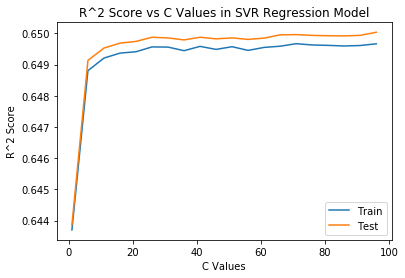

In [55]:
# ScikitLearn LinearSVR Regression (custom c_values):

C_values = range(1,100,5)

train_scores_svr = []
test_scores_svr = []

for c in C_values:

    # 1. Instantiate the model
    mySVR = LinearSVR(C=c)

    # 2. Fit the model
    mySVR.fit(X_svr_train, y_svr_train)

    train_scores_svr.append(mySVR.score(X_svr_train,y_svr_train))
    test_scores_svr.append(mySVR.score(X_svr_test,y_svr_test))
    
    # 3. Make prediction (will use it for mae)
    y_svr_test_pred = mySVR.predict(X_svr_test)

    # 4. R^2 score check:
    print("Result for the C=", c)
    print("The mean absolute error of our model is: ", mae(y_svr_test, y_svr_test_pred))
    print("The mean value of the price column is: ", y_svr_test.mean())
    print("The train set R^2 of our model is: ", round(mySVR.score(X_svr_train,y_svr_train),4))
    print("The test set R^2 of our model is: ", round(mySVR.score(X_svr_test,y_svr_test),4))
    print()
    
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs C Values in SVR Regression Model")
plt.plot(C_values, train_scores_svr, label="Train")
plt.plot(C_values, test_scores_svr, label="Test")
plt.legend()
plt.xlabel("C Values")
plt.ylabel("R^2 Score")
plt.show()

We can see from the graph that with higher C values, the R^2 scores generally tend to stay around the same 0.65 value, which is certainly not the best result we have seen so far. Let's just move onto our next model.

### 2.10. RandomForestRegressor

In [56]:
# ScikitLearn RandomForest Regression (default values): 

# Assigning data (X) and target (y) columns:
X_rf = df_work3.loc[:, df_work3.columns != 'price']
y_rf = df_work3['price']

print('X_rf shape:', X_rf.shape)
print('y_rf shape:', y_rf.shape)

# Let's split our dataframe into train and test sets:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state=1)

print('X_rf_train shape:', X_rf_train.shape)
print('y_rf_train shape:', y_rf_train.shape)
print('X_rf_test shape:', X_rf_test.shape)
print('y_rf_test shape:', y_rf_test.shape)
print("-------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myRF = RandomForestRegressor(random_state=1)

# 2. Fit the model:
myRF.fit(X_rf_train, y_rf_train)

# 3. Make prediction (will use it for mae):
y_rf_test_pred = myRF.predict(X_rf_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rf_test, y_rf_test_pred))
print("The mean value of the price column is: ", y_rf_test.mean())
print("The train set R^2 of our model is: ", round(myRF.score(X_rf_train,y_rf_train),4))
print("The test set R^2 of our model is: ", round(myRF.score(X_rf_test,y_rf_test),4))

# Saving our model:
joblib.dump(myRF, 'myRF_default.pkl')

X_rf shape: (362854, 108)
y_rf shape: (362854,)
X_rf_train shape: (290283, 108)
y_rf_train shape: (290283,)
X_rf_test shape: (72571, 108)
y_rf_test shape: (72571,)
-------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  1729.8365905104833
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.9855
The test set R^2 of our model is:  0.8978


['myRF_default.pkl']

In [57]:
# Let's see feature importances of our model:
feat_importances = pd.Series(myRF.feature_importances_, index=X_rf_train.columns)

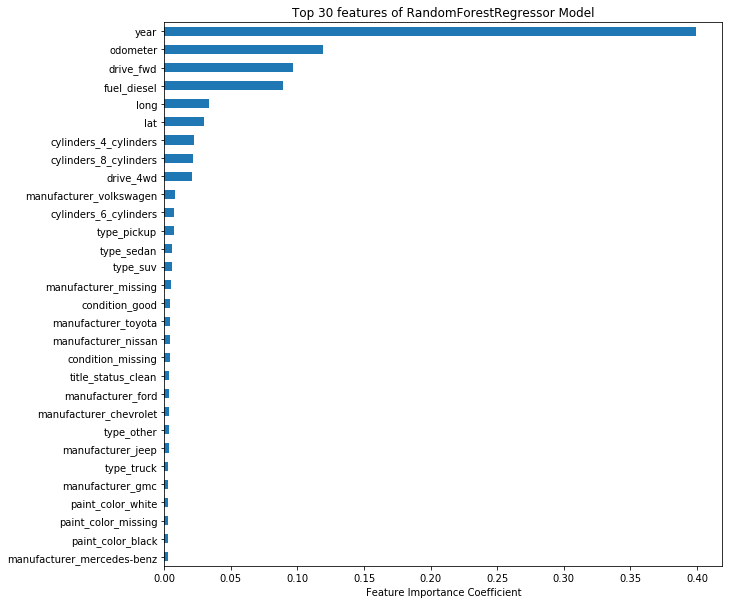

In [58]:
# Top 30 features:
fig, ax = plt.subplots()
feat_importances.sort_values(ascending=False).head(30).plot(kind='barh', x='x', y='y', ax=ax, figsize=(10,10))
plt.gca().invert_yaxis()
plt.title('Top 30 features of RandomForestRegressor Model')
plt.xlabel('Feature Importance Coefficient')
plt.show()

It can be clearly seen from the graph that the `year` column is the most important in predicting the price value. And as we saw from the correlation table above, in EDA section, the newer the model the higher the price of it will be. We can also see `odometer`, `drive_fwd` and `fuel_diesel` being top price predictive columns.

On the other hand, we can see that "paint_color" feature is at the very bottom of the top 30 features list, and it does not add any value, but rather take some computational time to process the model. Let's remove that feature from our model and run our model again, and see if the score has changed.

In [41]:
# Dropping 'paint_color' column:
df_work2_new = df_work2.drop(['paint_color'], axis=1)
df_work2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362854 entries, 0 to 539758
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         362854 non-null  int64  
 1   year          362854 non-null  float64
 2   manufacturer  362854 non-null  object 
 3   condition     362854 non-null  object 
 4   cylinders     362854 non-null  object 
 5   fuel          362854 non-null  object 
 6   odometer      362854 non-null  float64
 7   title_status  362854 non-null  object 
 8   transmission  362854 non-null  object 
 9   drive         362854 non-null  object 
 10  type          362854 non-null  object 
 11  lat           362854 non-null  float64
 12  long          362854 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ MB


In [42]:
# Let's now convert our categorical columns into dummy variables:
df_work3_new = pd.get_dummies(df_work2_new)
print("The shape of our new dataframe: ", df_work3_new.shape)

# Let's remove all the spaces within column names and make them all lowercase (in case if there are some uppercase letters):
df_work3_new.columns = df_work3_new.columns.str.replace(' ', '_')
df_work3_new.columns = map(str.lower, df_work3_new.columns)

# Resetting index:
df_work3_new = df_work3_new.reset_index().drop(columns = ['index']).copy()
df_work3_new

The shape of our new dataframe:  (362854, 96)


,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,type_hatchback,type_mini-van,type_missing,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362849,12955,2015.0,74508.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
362850,13995,2016.0,97545.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
362851,10995,2010.0,80328.0,35.7636,-78.7443,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
362852,6495,2015.0,83521.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now we can see that we have 96 columns, instead of 109 columns that we had to compute before. Let's now check our RF model's performance on the optimized dataset.

In [63]:
# ScikitLearn RandomForest Regression on new optimized dataset (default values):

# Assigning data (X) and target (y) columns:
X_rf = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_rf = df_work3_new['price']

print('X_rf shape:', X_rf.shape)
print('y_rf shape:', y_rf.shape)

# Let's split our dataframe into train and test sets:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state=1)

print('X_rf_train shape:', X_rf_train.shape)
print('y_rf_train shape:', y_rf_train.shape)
print('X_rf_test shape:', X_rf_test.shape)
print('y_rf_test shape:', y_rf_test.shape)
print("-------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myRF = RandomForestRegressor(random_state=1)

# 2. Fit the model:
myRF.fit(X_rf_train, y_rf_train)

# 3. Make prediction (will use it for mae):
y_rf_test_pred = myRF.predict(X_rf_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rf_test, y_rf_test_pred))
print("The mean value of the price column is: ", y_rf_test.mean())
print("The train set R^2 of our model is: ", round(myRF.score(X_rf_train,y_rf_train),4))
print("The test set R^2 of our model is: ", round(myRF.score(X_rf_test,y_rf_test),4))

# Saving our model:
joblib.dump(myRF, 'myRF_default_new.pkl')

X_rf shape: (362854, 95)
y_rf shape: (362854,)
X_rf_train shape: (290283, 95)
y_rf_train shape: (290283,)
X_rf_test shape: (72571, 95)
y_rf_test shape: (72571,)
-------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  1733.4998260437524
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.9854
The test set R^2 of our model is:  0.8975


['myRF_default_new.pkl']

We can see that our R^2 score and MAE have almost not changed, but the computational load on our model eased. 

#### 2.10.1. RandomForestRegressor: Hyperparameter Optimization

X_rf_small shape: (108856, 95)
y_rf_small shape: (108856,)
X_rf_train_small shape: (87084, 95)
y_rf_train_small shape: (87084,)
X_rf_test_small shape: (21772, 95)
y_rf_test_small shape: (21772,)
-------------------------------------------------------------------------------------------------------------
Train set R^2 score with n_estimators=10: 0.971838632433565
Test set R^2 score with n_estimators=10: 0.8408995284614909

Train set R^2 score with n_estimators=30: 0.9781011878083906
Test set R^2 score with n_estimators=30: 0.8515955922433618

Train set R^2 score with n_estimators=50: 0.9792245378582513
Test set R^2 score with n_estimators=50: 0.8541781576330306

Train set R^2 score with n_estimators=70: 0.9797523585186158
Test set R^2 score with n_estimators=70: 0.8554250739943718

Train set R^2 score with n_estimators=100: 0.9800714234766429
Test set R^2 score with n_estimators=100: 0.8560166577927044

Train set R^2 score with n_estimators=150: 0.9803589722168543
Test set R^2 score wit

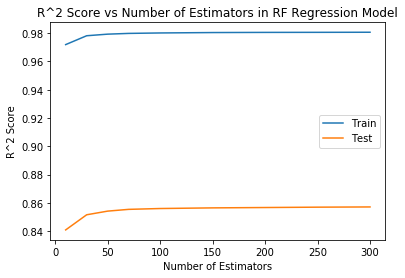

In [81]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of RandomForestRegressor model affect our R^2 score:
df_RF_small = df_work3_new.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns;
X_rf_small = df_RF_small.loc[:, df_RF_small.columns != 'price']
y_rf_small = df_RF_small['price']

print('X_rf_small shape:', X_rf_small.shape)
print('y_rf_small shape:', y_rf_small.shape)

# Let's now split the data into train and test sets:
X_rf_train_small, X_rf_test_small, y_rf_train_small, y_rf_test_small = train_test_split(X_rf_small, y_rf_small, test_size = 0.2, random_state=1)

print('X_rf_train_small shape:', X_rf_train_small.shape)
print('y_rf_train_small shape:', y_rf_train_small.shape)
print('X_rf_test_small shape:', X_rf_test_small.shape)
print('y_rf_test_small shape:', y_rf_test_small.shape)
print("-------------------------------------------------------------------------------------------------------------")


# Let's now run the RF model with different n_estimators and see how our R^2 scores change:
train_scores_rf = []
test_scores_rf = []

n_number = [10,30,50,70,100,150,200,250,300] 

for n in n_number:
    
    myRF = RandomForestRegressor(n_estimators=n, random_state=1)
    myRF.fit(X_rf_train_small, y_rf_train_small)
    
    train_scores_rf.append(myRF.score(X_rf_train_small, y_rf_train_small))
    test_scores_rf.append(myRF.score(X_rf_test_small, y_rf_test_small))
    
    print(f'Train set R^2 score with n_estimators={n}: {myRF.score(X_rf_train_small, y_rf_train_small)}')
    print(f'Test set R^2 score with n_estimators={n}: {myRF.score(X_rf_test_small, y_rf_test_small)}')
    print()

# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Number of Estimators in RF Regression Model")
plt.plot(n_number, train_scores_rf, label="Train")
plt.plot(n_number, test_scores_rf, label="Test")
plt.legend()
plt.xlabel("Number of Estimators")
plt.ylabel("R^2 Score")
plt.show()

We can see from the graph that after `n_estimators=100`, which is the model's default value, the test set R^2 score improves slightly, but it becomes much more heavy computationally. So, let's just keep the default value for now.

Train set R^2 score with max_depth=1: 0.3147067355194164
Test set R^2 score with max_depth=1: 0.3089673927143085

Train set R^2 score with max_depth=6: 0.6949280871190602
Test set R^2 score with max_depth=6: 0.6871351860992478

Train set R^2 score with max_depth=11: 0.8188220837064407
Test set R^2 score with max_depth=11: 0.7882396450849765

Train set R^2 score with max_depth=16: 0.906636197293115
Test set R^2 score with max_depth=16: 0.8306335867230076

Train set R^2 score with max_depth=21: 0.9533420412191008
Test set R^2 score with max_depth=21: 0.8476909730308715

Train set R^2 score with max_depth=26: 0.9717774402195805
Test set R^2 score with max_depth=26: 0.8539151241698093

Train set R^2 score with max_depth=31: 0.9778661002433889
Test set R^2 score with max_depth=31: 0.8555962861471778

Train set R^2 score with max_depth=36: 0.9795497516340743
Test set R^2 score with max_depth=36: 0.8562008165585426

Train set R^2 score with max_depth=41: 0.9799943126439525
Test set R^2 score 

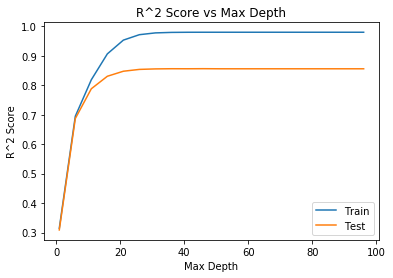

In [62]:
# Let's now run the RF model with different max_depth values and see how our R^2 scores change:
train_scores_rf_md = []
test_scores_rf_md = []

depth = list(range(1,100,5)) 

for d in depth:
    
    myRF = RandomForestRegressor(max_depth=d, random_state=1)
    myRF.fit(X_rf_train_small, y_rf_train_small)
    
    train_scores_rf_md.append(myRF.score(X_rf_train_small, y_rf_train_small))
    test_scores_rf_md.append(myRF.score(X_rf_test_small, y_rf_test_small))
    
    print(f'Train set R^2 score with max_depth={d}: {myRF.score(X_rf_train_small, y_rf_train_small)}')
    print(f'Test set R^2 score with max_depth={d}: {myRF.score(X_rf_test_small, y_rf_test_small)}')
    print()
    
# Let's plot our results:
plt.figure()
plt.title("R^2 Score vs Max Depth")
plt.plot(depth, train_scores_rf_md, label="Train")
plt.plot(depth, test_scores_rf_md, label="Test")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("R^2 Score")
plt.show()

In [65]:
# The max_depth value with highest R^2 score for the test set:
depth[np.argmax(test_scores_rf_md)]

46

In [67]:
# Creating our RF model (n_estimators=default(100), max_depth=46 - after hyperparameter optimization):

# Assigning data (X) and target (y) columns:
X_rf = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_rf = df_work3_new['price']

print('X_rf shape:', X_rf.shape)
print('y_rf shape:', y_rf.shape)

# Let's split our dataframe into train and test sets:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state=1)

print('X_rf_train shape:', X_rf_train.shape)
print('y_rf_train shape:', y_rf_train.shape)
print('X_rf_test shape:', X_rf_test.shape)
print('y_rf_test shape:', y_rf_test.shape)
print("-------------------------------------------------------------------------------------------------------------")

# 1. Instantiate the model:
myRF = RandomForestRegressor(max_depth=46, random_state=1)

# 2. Fit the model:
myRF.fit(X_rf_train, y_rf_train)

# 3. Make prediction (will use it for mae):
y_rf_test_pred = myRF.predict(X_rf_test)

# 4. R^2 score check:
print("The mean absolute error of our model is: ", mae(y_rf_test, y_rf_test_pred))
print("The mean value of the price column is: ", y_rf_test.mean())
print("The train set R^2 of our model is: ", round(myRF.score(X_rf_train,y_rf_train),4))
print("The test set R^2 of our model is: ", round(myRF.score(X_rf_test,y_rf_test),4))

# Saving our model:
joblib.dump(myRF, 'myRF_optimized.pkl')

X_rf shape: (362854, 95)
y_rf shape: (362854,)
X_rf_train shape: (290283, 95)
y_rf_train shape: (290283,)
X_rf_test shape: (72571, 95)
y_rf_test shape: (72571,)
-------------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  1733.5049251641785
The mean value of the price column is:  14254.943448484932
The train set R^2 of our model is:  0.9853
The test set R^2 of our model is:  0.8974


['myRF_optimized.pkl']

Well, results remained the same as running RF with default values. So, probably default RF values are good enough to give the best scores. Let's see what multiple hyperparameter optimization would show.

#### 2.10.2. RandomForestRegressor: Multiple Hyperparameter Optimization

Let's now use GridSearchCV to optimize multiple hyperparameters of our model and see if we can increase it's score.

In [42]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of RandomForestRegressor model affect our R^2 score:
df_RF_small = df_work3_new.sample(frac=0.3, random_state=1)

# Assigning data (X) and target (y) columns;
X_small = df_RF_small.loc[:, df_RF_small.columns != 'price']
y_small = df_RF_small['price']

print(X_small.shape)
print(y_small.shape)

(108856, 95)
(108856,)


In [43]:
# Let's define the hyperparameters to look through:
RF_params = {'max_depth':[10,15,20,30,40,50,60,70,80,90,100],\
             'min_samples_leaf':[1,2,3]}

In [45]:
# Initiate the RF grid search
myRF_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=1), param_grid=RF_params, cv=5, verbose=1)

# Fit the RF grid search
myRF_gs_fitted = myRF_gs.fit(X_small, y_small)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed: 327.9min finished


In [46]:
# Show the best estimators
print(myRF_gs_fitted.best_params_)

{'max_depth': 40, 'min_samples_leaf': 1}


The best `max_depth` value is 40, which again confirms our result from `max_depth` hyperparameter optimization above. Ideally, we would want to run GridSearchCV on a whole dataset, but due to computational load, we would accept R^2 value for RandomForest model as 0.8975. Let's now try our last model - XGBRegressor.

### 2.11. XGBRegressor

Let's now try XGBRegressor model and see how it will perform. Please note, because XGBoost is basically the tree based model, scaling won't be required to train the model (original GitHub [source](https://github.com/dmlc/xgboost/issues/357)).

In [72]:
# ScikitLearn XGB Regression (default values):

# Assigning data (X) and target (y) columns:
X_xgb = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_xgb = df_work3_new['price']

print('X_xgb shape:', X_xgb.shape)
print('y_xgb shape:', y_xgb.shape)

# Let's split our dataframe into train and test sets:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print("-------------------------------------------------------------------------------------------------------")


# 1. Instantiate the model:
myXGB = xgb.XGBRegressor(verbosity=0)
print("myXGB model parameters:", myXGB)
print("-------------------------------------------------------------------------------------------------------")

# 2. Fit the model:
myXGB.fit(X_xgb_train, y_xgb_train)

# 3. Make prediction (will use it for mae):
y_xgb_test_pred = myXGB.predict(X_xgb_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 of our model is: ", round(myXGB.score(X_xgb_train,y_xgb_train),4))
print("The test set R^2 of our model is: ", round(myXGB.score(X_xgb_test,y_xgb_test),4))

X_xgb shape: (362854, 95)
y_xgb shape: (362854,)
X_xgb_train shape: (290283, 95)
y_xgb_train shape: (290283,)
X_xgb_test shape: (72571, 95)
y_xgb_test shape: (72571,)
-------------------------------------------------------------------------------------------------------
myXGB model parameters: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
-------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3184.285258953559
The mean value of the price column is:  14254.943448484932


With default parameters for XGBRegressor model our scores are not too bad, but far from those of RandomForestRegressor default model. Let's try to tune our hyperparameters and see if the score would improve.

#### 2.11.2. XGBRegressor: Hyperparameter Optimization

Here, we'll be trying different 'booster' parameters. 

In [73]:
# ScikitLearn XGB Regression (booster='gblinear'):

# Assigning data (X) and target (y) columns:
X_xgb = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_xgb = df_work3_new['price']

print('X_xgb shape:', X_xgb.shape)
print('y_xgb shape:', y_xgb.shape)

# Let's split our dataframe into train and test sets:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")


# 1. Instantiate the model
myXGB = xgb.XGBRegressor(booster='gblinear', verbosity=0)
print("myXGB model parameters:", myXGB)
print("--------------------------------------------------------------------------------------------------------------------------------")

# 2. Fit the model
myXGB.fit(X_xgb_train, y_xgb_train)

# 3. Make prediction (will use it for mae)
y_xgb_test_pred = myXGB.predict(X_xgb_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 of our model is: ", round(myXGB.score(X_xgb_train,y_xgb_train),4))
print("The test set R^2 of our model is: ", round(myXGB.score(X_xgb_test,y_xgb_test),4))

X_xgb shape: (362854, 95)
y_xgb shape: (362854,)
X_xgb_train shape: (290283, 95)
y_xgb_train shape: (290283,)
X_xgb_test shape: (72571, 95)
y_xgb_test shape: (72571,)
-------------------------------------------------------------------------------------------------------
myXGB model parameters: XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
-------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  4759.6196752598335
The mean value of the price column is:  14254.9434484849

With `booster='gblinear'` parameter, the score even dropped below. Let's try another one.

In [74]:
# ScikitLearn XGB Regression (booster='dart'):

# Assigning data (X) and target (y) columns:
X_xgb = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_xgb = df_work3_new['price']

print('X_xgb shape:', X_xgb.shape)
print('y_xgb shape:', y_xgb.shape)

# Let's split our dataframe into train and test sets:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print("--------------------------------------------------------------------------------------------------------------------------------")


# 1. Instantiate the model
myXGB = xgb.XGBRegressor(booster='dart', verbosity=0)
print("myXGB model parameters:", myXGB)
print("--------------------------------------------------------------------------------------------------------------------------------")

# 2. Fit the model
myXGB.fit(X_xgb_train, y_xgb_train)

# 3. Make prediction (will use it for mae)
y_xgb_test_pred = myXGB.predict(X_xgb_test)

# R^2 score check:
print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The train set R^2 of our model is: ", round(myXGB.score(X_xgb_train,y_xgb_train),4))
print("The test set R^2 of our model is: ", round(myXGB.score(X_xgb_test,y_xgb_test),4))

X_xgb shape: (362854, 95)
y_xgb shape: (362854,)
X_xgb_train shape: (290283, 95)
y_xgb_train shape: (290283,)
X_xgb_test shape: (72571, 95)
y_xgb_test shape: (72571,)
-------------------------------------------------------------------------------------------------------
myXGB model parameters: XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
-------------------------------------------------------------------------------------------------------
The mean absolute error of our model is:  3184.285258953349
The mean value of the price column is:  14254.943448484932
Th

With `booster='dart'` parameter score is better than 'gblinear', but identical to the scores acquired from model's default `booster='gbtree'` parameter. So, we will just stick to default booster parameter. 

#### 2.11.2. XGBRegressor: Multiple Hyperparameter Optimization

Let's now use GridSearchCV to optimize multiple hyperparameters of our model and see if we can increase it's score.

In [76]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of XGBRegressor model affect our R^2 score:
df_xgb_small = df_work3_new.sample(frac=0.2, random_state=1)

# Assigning data (X) and target (y) columns;
X_xgb_small = df_xgb_small.loc[:, df_xgb_small.columns != 'price']
y_xgb_small = df_xgb_small['price']

print('X_xgb_small shape:', X_xgb_small.shape)
print('y_xgb_small shape:', y_xgb_small.shape)

# Let's split our dataframe into train and test sets:
X_xgb_small_train, X_xgb_small_test, y_xgb_small_train, y_xgb_small_test = train_test_split(X_xgb_small, y_xgb_small, test_size = 0.2, random_state=1)

print('X_xgb_small_train shape:', X_xgb_small_train.shape)
print('y_xgb_small_train shape:', y_xgb_small_train.shape)
print('X_xgb_small_test shape:', X_xgb_small_test.shape)
print('y_xgb_small_test shape:', y_xgb_small_test.shape)

X_xgb_small shape: (72571, 95)
y_xgb_small shape: (72571,)
X_xgb_small_train shape: (58056, 95)
y_xgb_small_train shape: (58056,)
X_xgb_small_test shape: (14515, 95)
y_xgb_small_test shape: (14515,)


In [77]:
# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[3,5,10,15,20,30,40,50],
             'n_estimators':[50,75,100,150,200,250,300]}

In [81]:
# Initiate the grid search:
myXGB_gs = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0), param_grid=XGB_params, cv=5, verbose=1)

# Fit the grid search:
myXGB_gs_fitted = myXGB_gs.fit(X_xgb_small_train, y_xgb_small_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 599.5min finished


In [82]:
# Saving our model:
joblib.dump(myXGB_gs_fitted, 'myXGB_gs_fitted_small_dataset.pkl') 

['myXGB_gs_fitted_small_dataset.pkl']

In [83]:
# Show the best estimators:
print(myXGB_gs_fitted.best_params_)

{'max_depth': 10, 'n_estimators': 300}


In [84]:
# Let's see if our R^2 score improved:

# Assigning data (X) and target (y) columns on the whole dataset:
X_xgb = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_xgb = df_work3_new['price']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('Train and Test datasets from the whole dataset:')
print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)
print()
print('Train and Test datasets from the small dataset:') # these were assigned before, and the model was trained on these
print('X_xgb_small_train shape:', X_xgb_small_train.shape)
print('y_xgb_small_train shape:', y_xgb_small_train.shape)
print('X_xgb_small_test shape:', X_xgb_small_test.shape)
print('y_xgb_small_test shape:', y_xgb_small_test.shape)

# Let's see if our R^2 score improved:
print("The small train set R^2 score of our model is: ", round(myXGB_gs_fitted.score(X_xgb_small_train, y_xgb_small_train),4))
print("The small test set R^2 score of our model is: ", round(myXGB_gs_fitted.score(X_xgb_small_test, y_xgb_small_test),4))

Train and Test datasets from the whole dataset:
X_xgb_train shape: (290283, 95)
y_xgb_train shape: (290283,)
X_xgb_test shape: (72571, 95)
y_xgb_test shape: (72571,)

Train and Test datasets from the small dataset:
X_xgb_small_train shape: (58056, 95)
y_xgb_small_train shape: (58056,)
X_xgb_small_test shape: (14515, 95)
y_xgb_small_test shape: (14515,)
The small train set R^2 score of our model is:  0.9485
The small test set R^2 score of our model is:  0.8671


In [85]:
# Let's just double check our model with new parameters but running on the whole dataset:

# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[10], 'n_estimators':[300]}

# Initiate the grid search:
myXGB_gs_big = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0), param_grid=XGB_params, cv=5, verbose=1)

# Fit the grid search:
myXGB_gs_big_fitted = myXGB_gs_big.fit(X_xgb_train, y_xgb_train)

# Saving our model:
joblib.dump(myXGB_gs_big_fitted, 'myXGB_gs_fitted_big_dataset_depth10.pkl') 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 37.3min finished


['myXGB_gs_fitted_big_dataset_depth10.pkl']

In [89]:
y_xgb_test_pred = myXGB_gs_big_fitted.predict(X_xgb_test)

print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The big train set R^2 score of our model is: ", round(myXGB_gs_big_fitted.score(X_xgb_train, y_xgb_train),4))
print("The big test set R^2 score of our model is: ", round(myXGB_gs_big_fitted.score(X_xgb_test, y_xgb_test),4))

The mean absolute error of our model is:  2123.0929604499693
The mean value of the price column is:  14254.943448484932
The big train set R^2 score of our model is:  0.9231
The big test set R^2 score of our model is:  0.8876


In [87]:
# Let's try now higher max_depth value:

# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[15], 'n_estimators':[300]}

# Initiate the grid search:
myXGB_gs_big = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0), param_grid=XGB_params, cv=5, verbose=1)

# Fit the grid search:
myXGB_gs_big_fitted_15 = myXGB_gs_big.fit(X_xgb_train, y_xgb_train)

# Saving our model:
joblib.dump(myXGB_gs_big_fitted_15, 'myXGB_gs_fitted_big_dataset_depth15.pkl') 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 57.8min finished


['myXGB_gs_fitted_big_dataset_depth15.pkl']

In [88]:
y_xgb_test_pred = myXGB_gs_big_fitted_15.predict(X_xgb_test)

print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The big train set R^2 score of our model is: ", round(myXGB_gs_big_fitted_15.score(X_xgb_train, y_xgb_train),4))
print("The big test set R^2 score of our model is: ", round(myXGB_gs_big_fitted_15.score(X_xgb_test, y_xgb_test),4))

The mean absolute error of our model is:  1751.0952870913504
The mean value of the price column is:  14254.943448484932
The big train set R^2 score of our model is:  0.9776
The big test set R^2 score of our model is:  0.909


Let's move on with adjusting parameters, but due to time constraints each parameter and result will be tried on separately.

In [43]:
# Let's try now even higher max_depth value:

# Assigning data (X) and target (y) columns on the whole dataset:
X_xgb = df_work3_new.loc[:, df_work3_new.columns != 'price']
y_xgb = df_work3_new['price']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size = 0.2, random_state=1)

print('Train and Test datasets from the whole dataset:')
print('X_xgb_train shape:', X_xgb_train.shape)
print('y_xgb_train shape:', y_xgb_train.shape)
print('X_xgb_test shape:', X_xgb_test.shape)
print('y_xgb_test shape:', y_xgb_test.shape)

# Let's define the hyperparameters to look through:
XGB_params = {'max_depth':[20], 'n_estimators':[300]}

# Initiate the grid search:
myXGB_gs_big = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1, verbosity=0), param_grid=XGB_params, cv=5, verbose=1)

# Fit the grid search:
myXGB_gs_big_fitted_20 = myXGB_gs_big.fit(X_xgb_train, y_xgb_train)

# Saving our model:
joblib.dump(myXGB_gs_big_fitted_20, 'myXGB_gs_fitted_big_dataset_depth20.pkl')

Train and Test datasets from the whole dataset:
X_xgb_train shape: (290283, 95)
y_xgb_train shape: (290283,)
X_xgb_test shape: (72571, 95)
y_xgb_test shape: (72571,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 95.0min finished


['myXGB_gs_fitted_big_dataset_depth20.pkl']

In [44]:
y_xgb_test_pred = myXGB_gs_big_fitted_20.predict(X_xgb_test)

print("The mean absolute error of our model is: ", mae(y_xgb_test, y_xgb_test_pred))
print("The mean value of the price column is: ", y_xgb_test.mean())
print("The big train set R^2 score of our model is: ", round(myXGB_gs_big_fitted_20.score(X_xgb_train, y_xgb_train),4))
print("The big test set R^2 score of our model is: ", round(myXGB_gs_big_fitted_20.score(X_xgb_test, y_xgb_test),4))

The mean absolute error of our model is:  1586.287487260895
The mean value of the price column is:  14254.943448484932
The big train set R^2 score of our model is:  0.9961
The big test set R^2 score of our model is:  0.9099


There is definitely an improvement in mean absolute error of our model, and a slight improvement in R^2 value.

Out of all the models, the best was found to be XGBRegressor model with a MAE of 1,586 (for the mean price of \\$14,255) and an R^2 value of 0.91.

Please note, there is also a 2nd jupyter notebook with neural network models. The data cleaning and EDA procedures are identical to this notebook.